3.10 多层感知机的简洁实现
下面我们使用tensorflow来实现上一节中的多层感知机。首先导入所需的包或模块

In [2]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

3.10.1 定义模型
和softmax回归唯一的不同在于，我们多加了一个全连接层作为隐藏层。它的隐藏单元个数为256，并使用ReLU函数作为激活函数。

In [5]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


3.10.2 读取数据并训练模型
我们使用与3.7节中训练softmax回归几乎相同的步骤来读取数据并训练模型。

In [7]:
# 加载Fashion MNIST数据集
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 数据预处理：将像素值缩放到0-1之间
x_train = x_train / 255.0
x_test = x_test / 255.0

# 编译模型
model.compile(
    # 使用学习率为0.5的随机梯度下降优化器
    optimizer=keras.optimizers.SGD(learning_rate=0.5),
    # 使用稀疏分类交叉熵作为损失函数
    loss='sparse_categorical_crossentropy',
    # 使用准确率作为评估指标
    metrics=['accuracy']
)

# 训练模型
history = model.fit(
    x_train, y_train,
    # 训练5个周期
    epochs=5,
    # 每批次使用256个样本
    batch_size=256,
    # 使用测试集作为验证数据
    validation_data=(x_test, y_test),
    # 每个周期进行一次验证
    validation_freq=1
)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8739 - loss: 0.3438 - val_accuracy: 0.8107 - val_loss: 0.5241
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8762 - loss: 0.3373 - val_accuracy: 0.8227 - val_loss: 0.4684
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8803 - loss: 0.3206 - val_accuracy: 0.8609 - val_loss: 0.3895
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8851 - loss: 0.3124 - val_accuracy: 0.8350 - val_loss: 0.4578
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8833 - loss: 0.3114 - val_accuracy: 0.8592 - val_loss: 0.4133


小结
通过Tensorflow2.0可以更简洁地实现多层感知机。

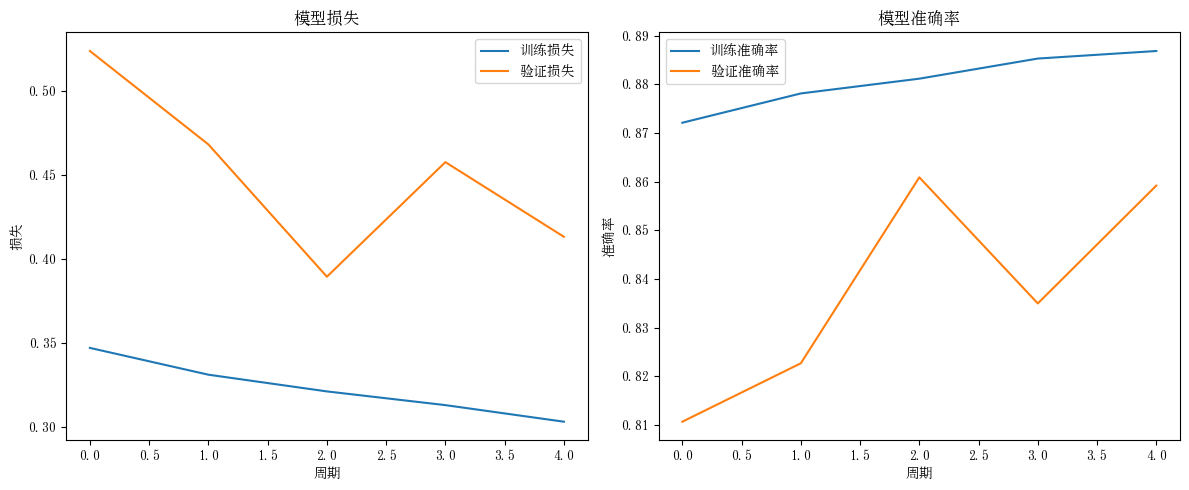

In [9]:
# 可视化训练结果
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimSong']
plt.rcParams['axes.unicode_minus'] = False


# 提取训练历史数据
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# 创建一个包含两个子图的图形
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 绘制损失曲线
ax1.plot(train_loss, label='训练损失')
ax1.plot(val_loss, label='验证损失')
ax1.set_title('模型损失')
ax1.set_xlabel('周期')
ax1.set_ylabel('损失')
ax1.legend()

# 绘制准确率曲线
ax2.plot(train_acc, label='训练准确率')
ax2.plot(val_acc, label='验证准确率')
ax2.set_title('模型准确率')
ax2.set_xlabel('周期')
ax2.set_ylabel('准确率')
ax2.legend()

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()